In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def order_points(pts):
    """
    Order 4 points as: top-left, top-right, bottom-right, bottom-left.
    pts: np.array shape (4,2)
    """
    rect = np.zeros((4,2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]   # top-left has smallest sum (x+y)
    rect[2] = pts[np.argmax(s)]   # bottom-right has largest sum
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]  # top-right has smallest diff (x-y)
    rect[3] = pts[np.argmax(diff)]  # bottom-left has largest diff
    return rect

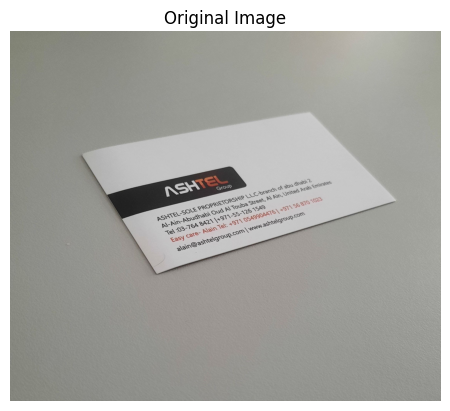

In [5]:
img_path = "business-card.jpg"   # change this to your file
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError(f"Cannot read '{img_path}' — make sure the file exists.")

# Convert BGR (OpenCV) to RGB (matplotlib) for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [9]:
src = np.array([
    [455.4091, 644.5455],
    [1553.1364, 440.68182],
    [1987.0, 874.5455],
    [821.3182, 1203.8636]
], dtype=np.float32)

# Ensure consistent ordering
src = order_points(src)

print("Source points being used:", src)

Source points being used: [[ 455.4091   644.5455 ]
 [1553.1364   440.68182]
 [1987.       874.5455 ]
 [ 821.3182  1203.8636 ]]


In [10]:
# Destination square corners
W_out, H_out = 250, 250
dst = np.array([
    [0, 0],
    [W_out - 1, 0],
    [W_out - 1, H_out - 1],
    [0, H_out - 1]
], dtype=np.float32)

# Compute perspective matrix & warp
H = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(img, H, (W_out, H_out), flags=cv2.INTER_LINEAR)

Saved: card_topdown_250x250.jpg


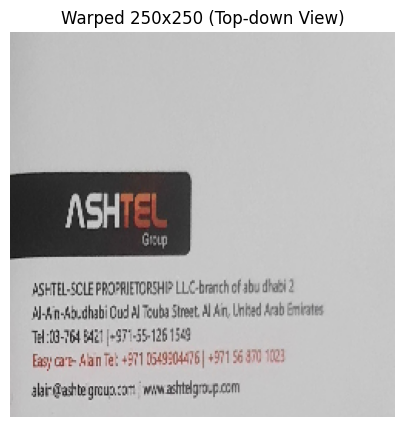

In [11]:
out_path = "card_topdown_250x250.jpg"
cv2.imwrite(out_path, warped)
print("Saved:", out_path)

plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title("Warped 250x250 (Top-down View)")
plt.axis('off')
plt.show()